# Installing Necessary Packages

In [2]:
!pip install tensorflow==2.13.0

## Data Preprocessing and Model Creation

In [3]:
import cv2
import os
import time
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import to_categorical
from keras.models import load_model

In [4]:
image_directory='datasets/'

no_tumor_images=os.listdir(image_directory+ 'no/')
yes_tumor_images=os.listdir(image_directory+ 'yes/')

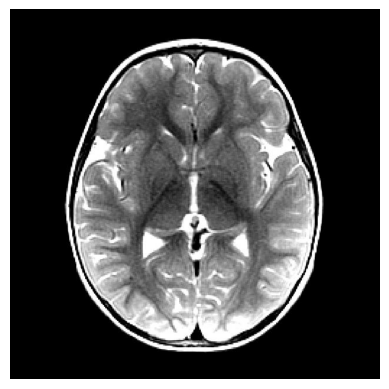

In [5]:
plt.figure()
img = cv2.imread(image_directory + 'no/' + no_tumor_images[0])
plt.imshow(img)
plt.axis('off')
plt.show() 

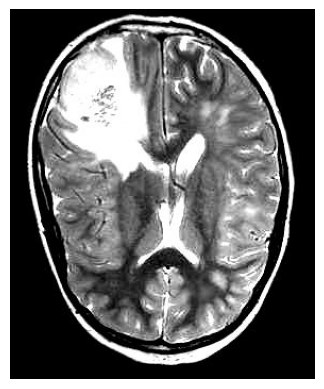

In [6]:
plt.figure()
img = cv2.imread(image_directory + 'yes/' + yes_tumor_images[0])
plt.imshow(img)
plt.axis('off')
plt.show() 

In [7]:
dataset=[]
label=[]

INPUT_SIZE=64

In [8]:
for i , image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [9]:
dataset=np.array(dataset)
label=np.array(label)

In [10]:
x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)

In [11]:
x_train=normalize(x_train, axis=1)
x_test=normalize(x_test, axis=1)

y_train=to_categorical(y_train , num_classes=2)
y_test=to_categorical(y_test , num_classes=2)

In [12]:
model=Sequential()

model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [13]:
start_time = time.time()
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history=model.fit(x_train, y_train, 
batch_size=16, 
verbose=1, epochs=10, 
validation_data=(x_test, y_test),
shuffle=False)
end_time = time.time()

Epoch 1/10
150/150 [==============================] - 8s 44ms/step - loss: 0.5414 - accuracy: 0.7250 - val_loss: 0.4840 - val_accuracy: 0.7667
Epoch 2/10
150/150 [==============================] - 7s 44ms/step - loss: 0.3946 - accuracy: 0.8329 - val_loss: 0.3447 - val_accuracy: 0.8467
Epoch 3/10
150/150 [==============================] - 7s 45ms/step - loss: 0.3045 - accuracy: 0.8804 - val_loss: 0.2599 - val_accuracy: 0.8833
Epoch 4/10
150/150 [==============================] - 10s 70ms/step - loss: 0.2297 - accuracy: 0.9104 - val_loss: 0.1914 - val_accuracy: 0.9400
Epoch 5/10
150/150 [==============================] - 8s 54ms/step - loss: 0.1652 - accuracy: 0.9367 - val_loss: 0.1752 - val_accuracy: 0.9500
Epoch 6/10
150/150 [==============================] - 8s 51ms/step - loss: 0.1166 - accuracy: 0.9546 - val_loss: 0.1312 - val_accuracy: 0.9567
Epoch 7/10
150/150 [==============================] - 7s 47ms/step - loss: 0.0790 - accuracy: 0.9725 - val_loss: 0.1569 - val_accuracy: 0.960

In [14]:
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 74.58022832870483 seconds


<b> As you can see, without Intel Optimizations, the time taken for training the dataset took 74.58 seconds and the accuracy is the same.

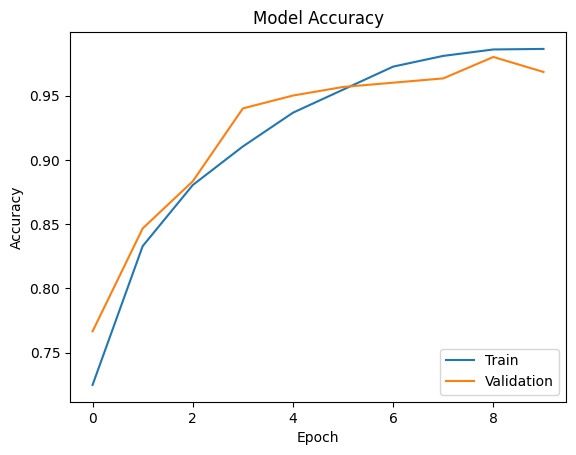

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

In [16]:
model.save('BrainTumor10EpochsCategorical.h5')

C:\Users\siddh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
model=load_model('BrainTumor10EpochsCategorical.h5')

In [18]:
image=cv2.imread('datasets/yes/y1.jpg')

img=Image.fromarray(image)

img=img.resize((64,64))

img=np.array(img)

input_img=np.expand_dims(img, axis=0)

In [19]:
result=model.predict(input_img)
class_index = np.argmax(result)
if class_index==0:
    print("No Brain Tumor")
elif class_index==1:
    print("Yes Brain Tumor")

1/1 [==============================] - 0s 244ms/step
Yes Brain Tumor


In [20]:
image=cv2.imread('datasets/no/no0.jpg')

img=Image.fromarray(image)

img=img.resize((64,64))

img=np.array(img)

input_img=np.expand_dims(img, axis=0)

In [21]:
result=model.predict(input_img)
class_index = np.argmax(result)
if class_index==0:
    print("No Brain Tumor")
elif class_index==1:
    print("Yes Brain Tumor")

1/1 [==============================] - 0s 52ms/step
No Brain Tumor
